# Full simulations of speed control

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

from aux import get_c_mean_p, get_c_spd
from disp import set_plot
from ntwk import SoftmaxNtwk

In [2]:
D = 16

mself = np.eye(D, dtype=bool)
mseq = np.diag(np.ones(D-1), -1).astype(bool)
mseq[0, -1] = True  # periodic

t_max = 600
t = np.arange(t_max)

In [3]:
N = 2000
# N = 1000

In [4]:
A = np.arange(0, 2*np.pi, 2*np.pi/D)

# Mean-driven sequence network (starting from mean-self-coupled network)

In [5]:
MU_J_SELF = 3
MU_J_CROSS = 0
MU_J_SEQS = np.arange(1, 5, .25)

SGM_J_SELF = 1
SGM_J_CROSS = 1
SGM_J_SEQ = 1

ths_all = []
xs_all = []
ys_all = []

for MU_J_SEQ in MU_J_SEQS:
    sys.stdout.write('\n>')

    MU_J = np.nan*np.zeros((D, D))
    SGM_J = np.nan*np.zeros((D, D))

    MU_J[mself] = MU_J_SELF
    MU_J[~mself] = MU_J_CROSS
    MU_J[mseq] = MU_J_SEQ

    SGM_J[mself] = SGM_J_SELF
    SGM_J[~mself] = SGM_J_CROSS
    SGM_J[mseq] = SGM_J_SEQ
    
    J = np.nan*np.zeros((D, D, N, N))

    for d_to in range(D):
        for d_from in range(D):
            J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N)*np.random.randn(N, N) + MU_J[d_to, d_from]*D/N

    ntwk = SoftmaxNtwk(J)
    
    x_0 = np.random.randn(N, D)
    x_0[:, :10] *= 5
    g = np.inf
    t, xs, ys = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=20)

    ths = ys.mean(axis=1)
        
    ths_all.append(ths)
    xs_all.append(xs.copy())
    ys_all.append(ys.copy())


>.............................
>.............................
>.............................
>.............................
>.............................
>.............................
>.............................
>.............................
>.............................
>.............................
>.............................
>.............................
>.............................
>.............................
>.............................
>.............................

In [6]:
# estimate speeds
t_start = 200
c_means = [get_c_mean_p(A, ths) for ths in ths_all]
spds = [get_c_spd(c_mean, t_start)*D/(2*np.pi) for c_mean in c_means]

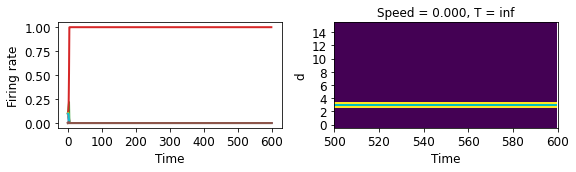

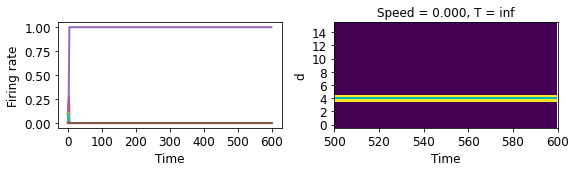

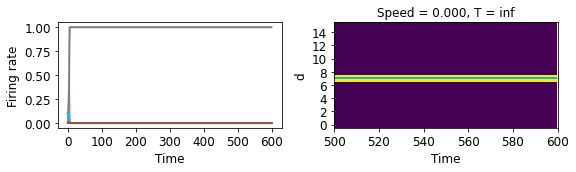

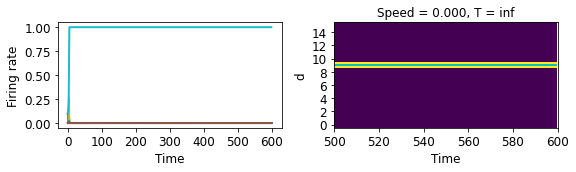

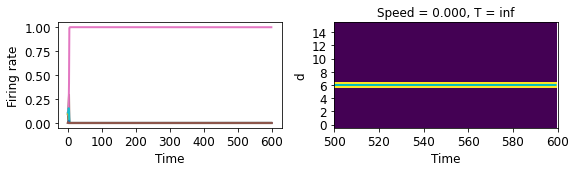

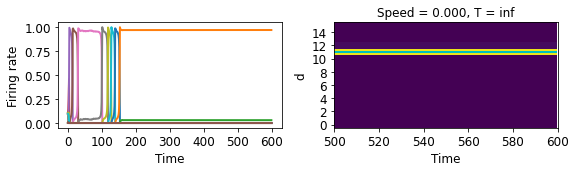

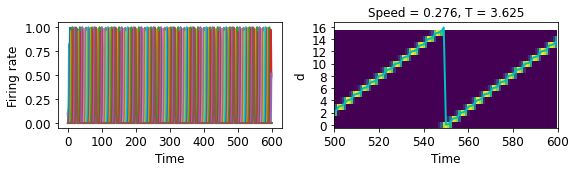

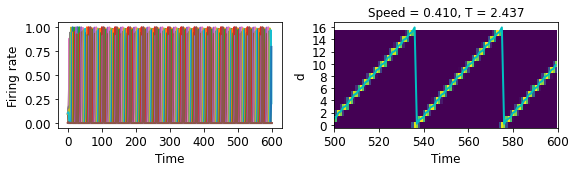

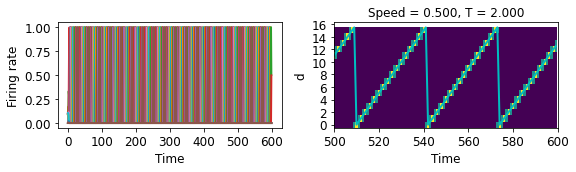

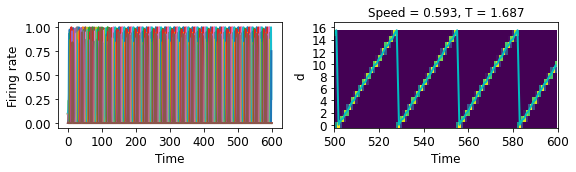

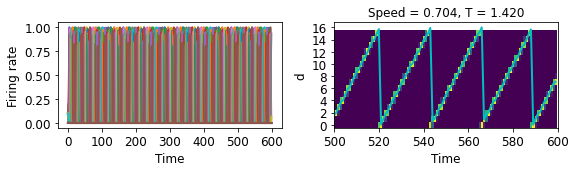

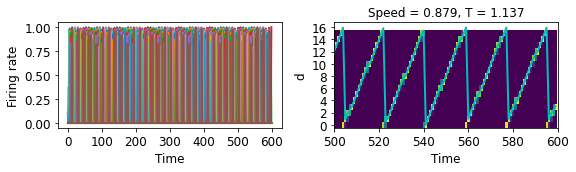

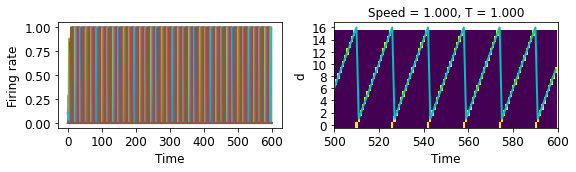

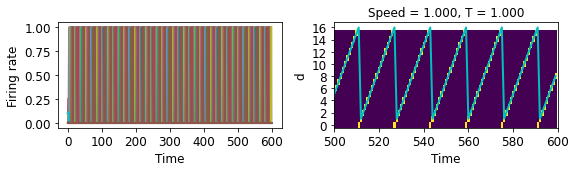

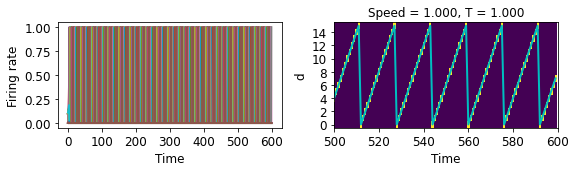

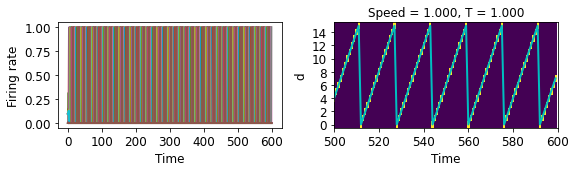

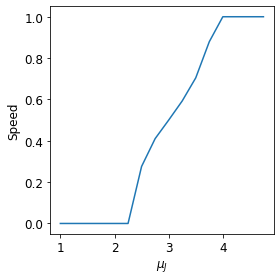

In [7]:
for ths, c_mean, spd in zip(ths_all, c_means, spds):
    fig, axs = plt.subplots(1, 2, figsize=(8, 2.5), tight_layout=True)
    
    axs[0].plot(ths, lw=2)
    set_plot(axs[0], x_label='Time', y_label='Firing rate')
    
    axs[1].matshow(ths.T, origin='lower')
    axs[1].set_aspect('auto')
    axs[1].plot((c_mean % (2*np.pi))*D/(2*np.pi), c='c', lw=2)
    
    axs[1].xaxis.tick_bottom()
    set_plot(axs[1], x_lim=(t_max-100, t_max), x_label='Time', y_label='d', title=f'Speed = {spd:.3f}, T = {1/spd:.3f}')


fig, ax = plt.subplots(1, 1, figsize=(4, 4), tight_layout=True)
ax.plot(MU_J_SEQS, spds)

set_plot(ax, x_label=f'$\mu_J$', y_label='Speed')

In [8]:
np.save('data/seq_speed/seqs_md_full.npy', np.array([{
    'MU_J_SEQS': MU_J_SEQS,
    'spds': spds,
    'ths_all': ths_all,
    'xs_all': xs_all,
    'ys_all': ys_all,
}]))

# Variance-driven sequence network (starting from variance self-coupled network)

In [ ]:
MU_J_SELF = 0
MU_J_CROSS = 0
MU_J_SEQ = 0

SGM_J_SELF = 10
SGM_J_CROSS = 1
SGM_J_SEQS = np.arange(1, 17)

ths_all = []
xs_all = []
ys_all = []

for SGM_J_SEQ in SGM_J_SEQS:
    sys.stdout.write('\n>')

    MU_J = np.nan*np.zeros((D, D))
    SGM_J = np.nan*np.zeros((D, D))

    MU_J[mself] = MU_J_SELF
    MU_J[~mself] = MU_J_CROSS
    MU_J[mseq] = MU_J_SEQ

    SGM_J[mself] = SGM_J_SELF
    SGM_J[~mself] = SGM_J_CROSS
    SGM_J[mseq] = SGM_J_SEQ

    J = np.nan*np.zeros((D, D, N, N))

    for d_to in range(D):
        for d_from in range(D):
            J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N)*np.random.randn(N, N) + MU_J[d_to, d_from]*D/N

    ntwk = SoftmaxNtwk(J)
    
    x_0 = np.random.randn(N, D)
    x_0[:, :10] *= 5
    g = np.inf
    t, xs, ys = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=20)

    ths = ys.mean(axis=1)
        
    ths_all.append(ths)
    xs_all.append(xs.copy())
    ys_all.append(ys.copy())

In [ ]:
# estimate speeds
t_start = 200
c_means = [get_c_mean_p(A, ths) for ths in ths_all]
spds = [get_c_spd(c_mean, t_start)*D/(2*np.pi) for c_mean in c_means]

In [ ]:
for ths, c_mean, spd in zip(ths_all, c_means, spds):
    fig, axs = plt.subplots(1, 2, figsize=(8, 2.5), tight_layout=True)
    
    axs[0].plot(ths, lw=2)
    set_plot(axs[0], x_label='Time', y_label='Firing rate')
    
    axs[1].matshow(ths.T, origin='lower')
    axs[1].set_aspect('auto')
    axs[1].plot((c_mean % (2*np.pi))*D/(2*np.pi), c='c', lw=2)
    
    axs[1].xaxis.tick_bottom()
    set_plot(axs[1], x_label='Time', y_label='d', title=f'Speed = {spd:.3f}, T = {1/spd:.3f}')


fig, ax = plt.subplots(1, 1, figsize=(4, 4), tight_layout=True)
ax.plot(SGM_J_SEQS, spds, c='k')

set_plot(ax, x_label=f'$\sigma_J$', y_label='Speed')

In [ ]:
np.save('data/seq_speed/seqs_fd_full.npy', np.array([{
    'SGM_J_SEQS': SGM_J_SEQS,
    'spds': spds,
    'ths_all': ths_all,
    'xs_all': xs_all,
    'ys_all': ys_all,
}]))